# BEDU
# Prototype Day

## COVID - 19 en México

Se analiza la información referente a casos COVID-19 en México, conjunto de datos obtenido de: https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico

* FECHA_ACTUALIZACION	La base de datos se alimenta diariamente, esta variable permite identificar la fecha de la ultima actualizacion.
* ID_REGISTRO	Número identificador del caso
* ORIGEN	
* SECTOR	Identifica el tipo de institución del Sistema Nacional de Salud que brindó la atención.
* ENTIDAD_UM	Identifica la entidad donde se ubica la unidad medica que brindó la atención.
* SEXO	Identifica al sexo del paciente.
* ENTIDAD_NAC	Identifica la entidad de nacimiento del paciente.
* ENTIDAD_RES	Identifica la entidad de residencia del paciente.
* MUNICIPIO_RES	Identifica el municipio de residencia del paciente.
* TIPO_PACIENTE	Identifica el tipo de atención que recibió el paciente en la unidad. Se denomina como ambulatorio si regresó a su casa o se denomina como hospitalizado si fue ingresado a hospitalización.
* FECHA_INGRESO	Identifica la fecha de ingreso del paciente a la unidad de atención.
* FECHA_SINTOMAS	Idenitifica la fecha en que inició la sintomatología del paciente.
* FECHA_DEF	Identifica la fecha en que el paciente falleció.
* INTUBADO	Identifica si el paciente requirió de intubación.
* NEUMONIA	Identifica si al paciente se le diagnosticó con neumonía.
* EDAD	Identifica la edad del paciente.
* NACIONALIDAD	Identifica si el paciente es mexicano o extranjero.
* EMBARAZO	Identifica si la paciente está embarazada.
* HABLA_LENGUA_INDIG	Identifica si el paciente habla lengua índigena.
* INDIGENA	Identifica si el paciente se autoidentifica como una persona indígena. 
* DIABETES	Identifica si el paciente tiene un diagnóstico de diabetes. 
* EPOC	Identifica si el paciente tiene un diagnóstico de EPOC. 
* ASMA	Identifica si el paciente tiene un diagnóstico de asma. 
* INMUSUPR	Identifica si el paciente presenta inmunosupresión.
* HIPERTENSION	Identifica si el paciente tiene un diagnóstico de hipertensión. 
* OTRAS_COM	Identifica si el paciente tiene diagnóstico de otras enfermedades.
* CARDIOVASCULAR	Identifica si el paciente tiene un diagnóstico de enfermedades cardiovasculares. 
* OBESIDAD	Identifica si el paciente tiene diagnóstico de obesidad.
* RENAL_CRONICA	Identifica si el paciente tiene diagnóstico de insuficiencia renal crónica.
* TABAQUISMO	Identifica si el paciente tiene hábito de tabaquismo.
* OTRO_CASO	Identifica si el paciente tuvo contacto con algún otro caso diagnósticado con SARS CoV-2
* TOMA_MUESTRA_LAB	Identifica si al paciente se le tomó muestra de laboratorio.
* RESULTADO_LAB	Identifica el resultado del análisis de la muestra reportado por el  laboratorio de la Red Nacional de Laboratorios de Vigilancia Epidemiológica (INDRE, LESP y LAVE) y laboratorios privados avalados por el InDRE cuyos resultados son registrados en SISVER. (Catálogo de resultados diagnósticos anexo).
* TOMA_MUESTRA_ANTIGENO	Identifica si al paciente se le tomó muestra de antígeno para SARS-CoV-2
* RESULTADO_ANTIGENO	Identifica el resultado del análisis de la muestra de antígeno tomada al paciente
* CLASIFICACION_FINAL	Identifica si el paciente es un caso de COVID-19 según el catálogo "CLASIFICACION_FINAL".
* MIGRANTE	Identifica si el paciente es una persona migrante.
* PAIS_NACIONALIDAD	Identifica la nacionalidad del paciente.
* PAIS_ORIGEN	Identifica el país del que partió el paciente rumbo a México.
* UCI	Identifica si el paciente requirió ingresar a una Unidad de Cuidados Intensivos.


In [10]:
! pip install -U scikit-learn

In [1]:
# Importamos pandas para cargar nuestro csv
import pandas as pd


In [ ]:
# Para efectos de optimización trabajaremos con una muestra del 10%
#df = pd.read_csv("/content/211104COVID19MEXICO.csv")
#df_sample = df.sample(frac=0.1)
#df_sample.to_csv('covid_sample.csv')

In [3]:
df = pd.read_csv("/content/covid_sample.csv")
df.head()

,Unnamed: 0,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,648286,2021-11-04,06f193,2,12,27,1,27,27,9,1,2020-06-25,2020-06-23,9999-99-99,97,2,34,1,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,97.0,7.0,99.0,México,97,97.0
1,3658459,2021-11-04,2765e3,2,4,19,2,19,19,39,1,2020-12-30,2020-12-29,9999-99-99,97,2,40,1,97,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,97.0,3.0,99.0,México,97,97.0
2,3228451,2021-11-04,2a2e1a,2,4,20,2,20,20,439,1,2020-12-14,2020-12-10,9999-99-99,97,2,46,1,97,1,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,99.0,México,97,97.0
3,7452051,2021-11-04,d15021,2,12,9,1,9,9,5,1,2021-06-16,2021-06-16,9999-99-99,97,2,29,1,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,97.0,1.0,2.0,7.0,99.0,México,97,97.0
4,1367608,2021-11-04,1bdcac,2,12,23,2,23,23,5,1,2020-08-17,2020-08-11,9999-99-99,97,2,24,1,97,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,97.0,7.0,99.0,México,97,97.0


In [4]:
# Librerías para visualización de datos 
import seaborn as sns 
import matplotlib.pyplot as plt
# Librerías para regresión lineal 
from sklearn.linear_model import LinearRegression
# Librerías para modelado 
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
# Import numpy 
import numpy as np

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler,RobustScaler,PolynomialFeatures,PowerTransformer,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df.columns

Index(['Unnamed: 0', 'FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR',
       'ENTIDAD_UM', 'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES',
       'TIPO_PACIENTE', 'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF',
       'INTUBADO', 'NEUMONIA', 'EDAD', 'NACIONALIDAD', 'EMBARAZO',
       'HABLA_LENGUA_INDIG', 'INDIGENA', 'DIABETES', 'EPOC', 'ASMA',
       'INMUSUPR', 'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'TOMA_MUESTRA_LAB',
       'RESULTADO_LAB', 'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO',
       'CLASIFICACION_FINAL', 'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN',
       'UCI'],
      dtype='object')

In [ ]:
df.describe()

,Unnamed: 0,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,UCI
count,9.599730e+05,959973.000000,959973.000000,959973.000000,959973.000000,959973.000000,959973.000000,959973.000000,959973.000000,959973.000000,959973.000000,959973.000000,959973.000000,959973.000000,959973.000000,959973.000000,959973.000000,959973.000000,959973.000000,959972.000000,959972.000000,959972.000000,959972.000000,959972.000000,959972.000000,959972.000000,959972.000000,959972.000000,959972.000000,959972.000000,959972.000000,959972.000000,959972.000000,959972.000000
mean,4.800249e+06,1.744690,9.172529,14.129599,1.478157,15.327429,14.454125,30.905157,1.096120,87.990740,2.092609,39.519529,1.005767,47.743163,7.461241,7.371473,2.089560,2.157555,2.137759,2.158318,2.044341,2.266716,2.150924,2.051764,2.147208,2.094370,4.768032,1.520664,51.304857,1.471251,46.638402,5.518837,98.496210,87.994709
std,2.770100e+06,0.436036,3.727060,7.704457,0.499523,9.963185,7.628195,43.976189,0.294756,27.855642,3.907339,16.842271,0.075720,47.479540,22.371663,22.203555,4.142369,3.982699,3.914705,3.978920,3.981516,5.199651,3.948325,3.871784,3.894520,4.039718,17.289314,0.499573,47.626706,0.499173,47.545645,1.960540,6.981457,27.844722
min,1.200000e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.405411e+06,1.000000,4.000000,9.000000,1.000000,9.000000,9.000000,7.000000,1.000000,97.000000,2.000000,27.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,3.000000,99.000000,97.000000
50%,4.797993e+06,2.000000,12.000000,10.000000,1.000000,13.000000,12.000000,15.000000,1.000000,97.000000,2.000000,38.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000,1.000000,2.000000,7.000000,99.000000,97.000000
75%,7.198540e+06,2.000000,12.000000,19.000000,2.000000,20.000000,19.000000,38.000000,1.000000,97.000000,2.000000,51.000000,1.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000,2.000000,97.000000,7.000000,99.000000,97.000000
max,9.599733e+06,2.000000,99.000000,32.000000,2.000000,99.000000,32.000000,999.000000,2.000000,99.000000,99.000000,121.000000,2.000000,98.000000,99.000000,99.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,2.000000,97.000000,2.000000,97.000000,7.000000,99.000000,99.000000


In [ ]:
# Exploramos los tipos de datos de las columnas
df.dtypes

Unnamed: 0                 int64
FECHA_ACTUALIZACION       object
ID_REGISTRO               object
ORIGEN                     int64
SECTOR                     int64
ENTIDAD_UM                 int64
SEXO                       int64
ENTIDAD_NAC                int64
ENTIDAD_RES                int64
MUNICIPIO_RES              int64
TIPO_PACIENTE              int64
FECHA_INGRESO             object
FECHA_SINTOMAS            object
FECHA_DEF                 object
INTUBADO                   int64
NEUMONIA                   int64
EDAD                       int64
NACIONALIDAD               int64
EMBARAZO                   int64
HABLA_LENGUA_INDIG         int64
INDIGENA                   int64
DIABETES                   int64
EPOC                       int64
ASMA                       int64
INMUSUPR                 float64
HIPERTENSION             float64
OTRA_COM                 float64
CARDIOVASCULAR           float64
OBESIDAD                 float64
RENAL_CRONICA            float64
TABAQUISMO

In [ ]:
#Comando shape para conocer registros y columnas
df.shape

(959973, 41)

In [11]:
# Seleccionamos únicamente columnas binarias 
df_entsex = df[['ENTIDAD_UM','SEXO','EDAD','INTUBADO','NEUMONIA','EMBARAZO','DIABETES','EPOC','ASMA','INMUSUPR','HIPERTENSION','OTRA_COM','CARDIOVASCULAR','OBESIDAD','RENAL_CRONICA','TABAQUISMO','OTRO_CASO']]
df_entsex = df_entsex.replace({'INTUBADO':2,'NEUMONIA':2,'EMBARAZO':2,'DIABETES':2,'EPOC':2,'ASMA':2,'INMUSUPR':2,'HIPERTENSION':2,'OTRA_COM':2,'CARDIOVASCULAR':2,'OBESIDAD':2,'RENAL_CRONICA':2,'TABAQUISMO':2,'OTRO_CASO':2}, 0)
df_entsex = df_entsex.replace({'INTUBADO':97,'NEUMONIA':97,'EMBARAZO':97,'DIABETES':97,'EPOC':97,'ASMA':97,'INMUSUPR':97,'HIPERTENSION':97,'OTRA_COM':97,'CARDIOVASCULAR':97,'OBESIDAD':97,'RENAL_CRONICA':97,'TABAQUISMO':97,'OTRO_CASO':97}, 0)
df_entsex = df_entsex.replace({'INTUBADO':98,'NEUMONIA':98,'EMBARAZO':98,'DIABETES':98,'EPOC':98,'ASMA':98,'INMUSUPR':98,'HIPERTENSION':98,'OTRA_COM':98,'CARDIOVASCULAR':98,'OBESIDAD':98,'RENAL_CRONICA':98,'TABAQUISMO':98,'OTRO_CASO':98}, 0)
df_entsex = df_entsex.replace({'INTUBADO':99,'NEUMONIA':99,'EMBARAZO':99,'DIABETES':99,'EPOC':99,'ASMA':99,'INMUSUPR':99,'HIPERTENSION':99,'OTRA_COM':99,'CARDIOVASCULAR':99,'OBESIDAD':99,'RENAL_CRONICA':99,'TABAQUISMO':99,'OTRO_CASO':99}, 0)
# Agrupamos por entidad, edad y sexo
df_entsex = df_entsex.groupby(['ENTIDAD_UM','EDAD','SEXO'], as_index=False).sum()
df_entsex


,ENTIDAD_UM,EDAD,SEXO,INTUBADO,NEUMONIA,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO
0,1,0,1,0,2,1,0,0,1,0.0,0.0,0.0,0.0,2.0,0.0,1.0,5.0
1,1,0,2,2,4,0,1,1,0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0
2,1,1,1,1,3,0,0,0,1,0.0,0.0,1.0,2.0,0.0,0.0,0.0,2.0
3,1,1,2,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0
4,1,2,1,1,1,0,0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385,32,97,1,0,1,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6386,32,97,2,0,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6387,32,98,2,1,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6388,32,99,1,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


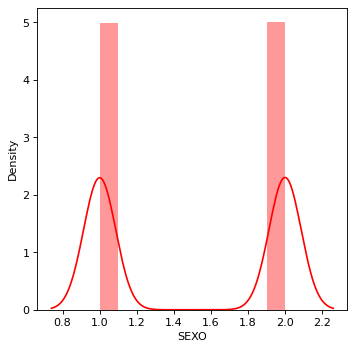

In [ ]:
plt.figure(figsize=(5,5), dpi = 80) 
sns.distplot(df_entsex.SEXO, color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


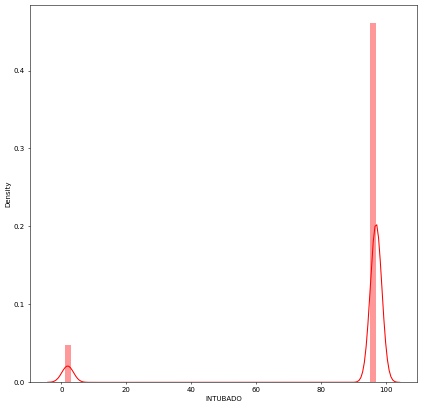

In [ ]:
plt.figure(figsize=(10,10), dpi = 50) 
sns.distplot(df.INTUBADO, color='red')

Text(0, 0.5, 'Intubados')

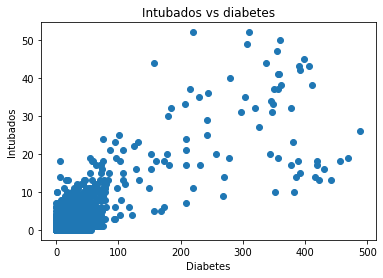

In [ ]:
# Gráfico de dispersión 
plt.scatter(df_entsex["DIABETES"], df_entsex["INTUBADO"])
plt.title("Intubados vs diabetes")
plt.xlabel("Diabetes")
plt.ylabel("Intubados")

In [ ]:
!pip install dataprep

In [ ]:
from dataprep.eda import create_report
report = create_report(df_entsex, title='EDA')

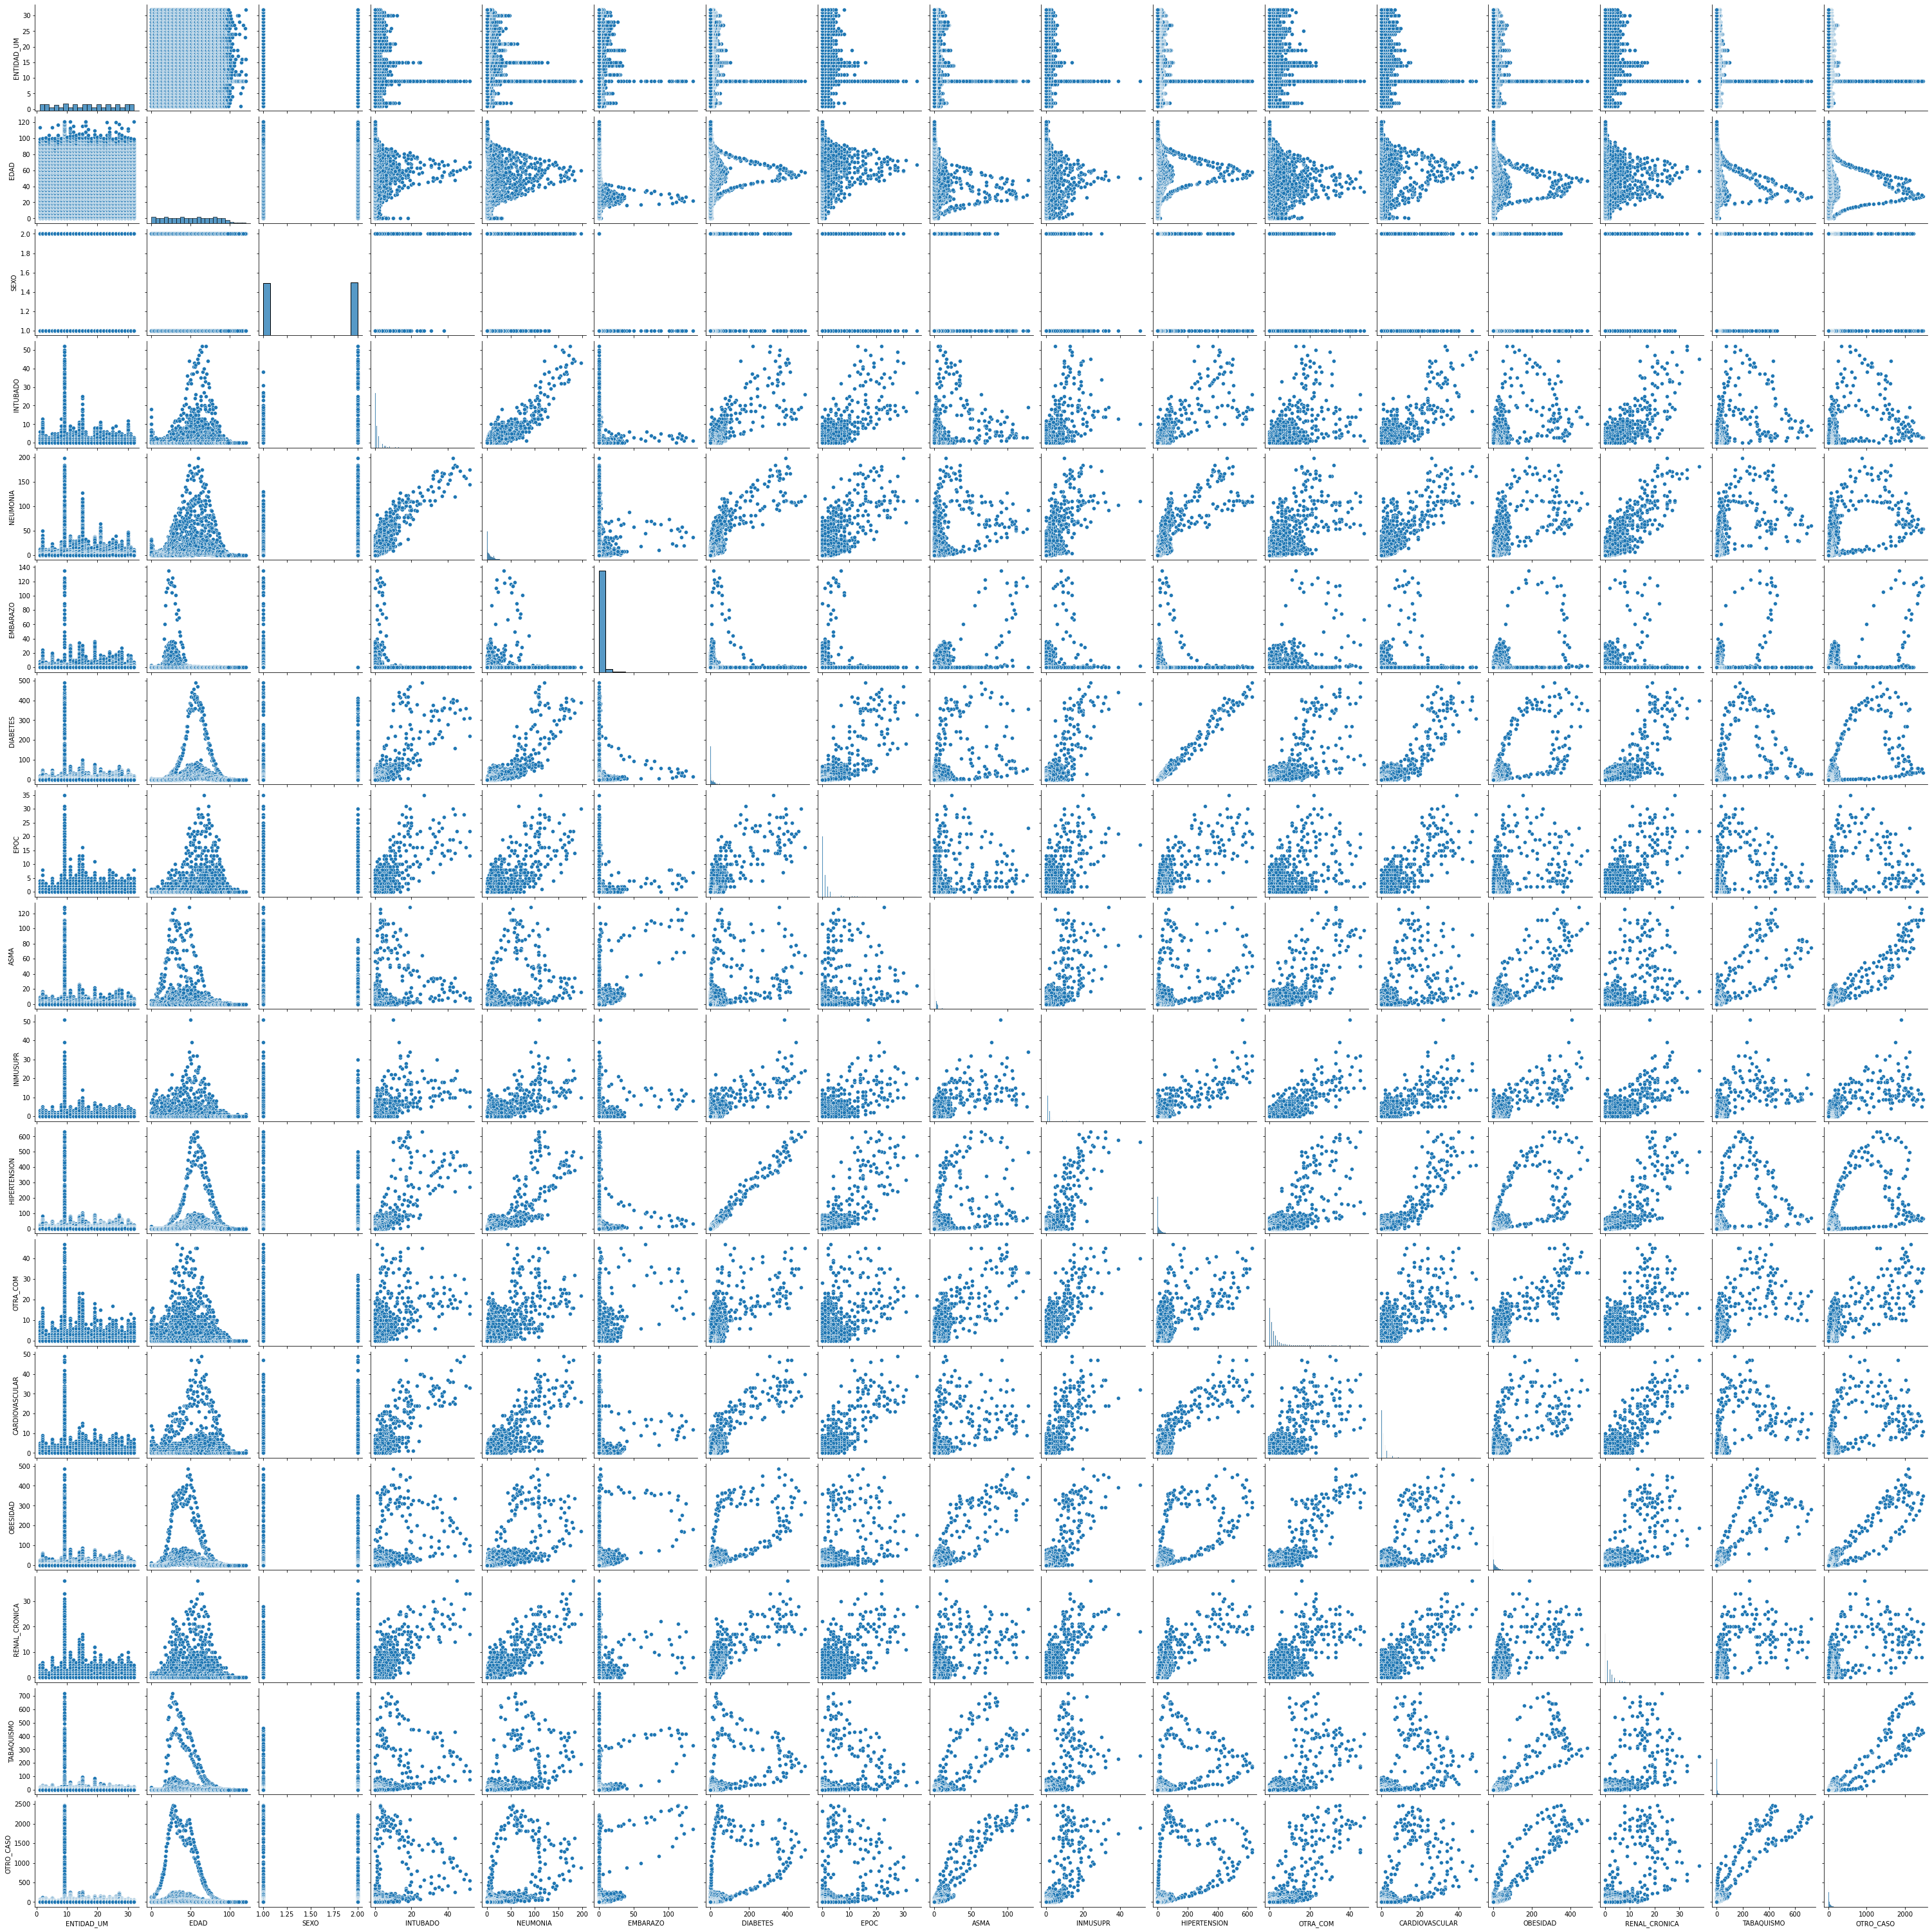

In [ ]:
# Obtenemos gráficos de dispersión 
sns.pairplot(df_entsex)

In [ ]:
# Mostramos correlación 
df_entsex.corr()

,ENTIDAD_UM,EDAD,SEXO,INTUBADO,NEUMONIA,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO
ENTIDAD_UM,1.000000,-0.006646,-0.002669,-0.077681,-0.055233,-0.025388,-0.064521,-0.076278,-0.072107,-0.090436,-0.069097,-0.086639,-0.088484,-0.075309,-0.064711,-0.097292,-0.093014
EDAD,-0.006646,1.000000,0.002232,0.102815,0.098173,-0.148561,0.092829,0.232400,-0.144697,-0.040070,0.100114,-0.076074,0.122546,-0.078083,0.076913,-0.076358,-0.104045
SEXO,-0.002669,0.002232,1.000000,0.113905,0.087050,-0.193106,-0.020063,-0.013714,-0.101265,-0.039261,-0.031387,-0.102759,0.013229,-0.049105,0.034639,0.064698,-0.025509
INTUBADO,-0.077681,0.102815,0.113905,1.000000,0.881861,-0.017462,0.802951,0.725435,0.278257,0.611532,0.782774,0.553455,0.796366,0.504130,0.759574,0.434363,0.419148
NEUMONIA,-0.055233,0.098173,0.087050,0.881861,1.000000,0.088804,0.840933,0.739492,0.443542,0.715960,0.821995,0.686324,0.818458,0.674235,0.846054,0.566793,0.570398
EMBARAZO,-0.025388,-0.148561,-0.193106,-0.017462,0.088804,1.000000,0.023744,0.018713,0.593847,0.201873,0.023175,0.357075,0.131216,0.383401,0.169450,0.355605,0.511683
DIABETES,-0.064521,0.092829,-0.020063,0.802951,0.840933,0.023744,1.000000,0.768937,0.486692,0.797283,0.989163,0.703204,0.867010,0.720282,0.813551,0.494823,0.578593
EPOC,-0.076278,0.232400,-0.013714,0.725435,0.739492,0.018713,0.768937,1.000000,0.316921,0.622707,0.786951,0.533664,0.797271,0.466958,0.699427,0.340641,0.391393
ASMA,-0.072107,-0.144697,-0.101265,0.278257,0.443542,0.593847,0.486692,0.316921,1.000000,0.698973,0.502112,0.750587,0.530074,0.876628,0.554230,0.809093,0.934936
INMUSUPR,-0.090436,-0.040070,-0.039261,0.611532,0.715960,0.201873,0.797283,0.622707,0.698973,1.000000,0.808343,0.779032,0.764374,0.801401,0.745110,0.639247,0.747676


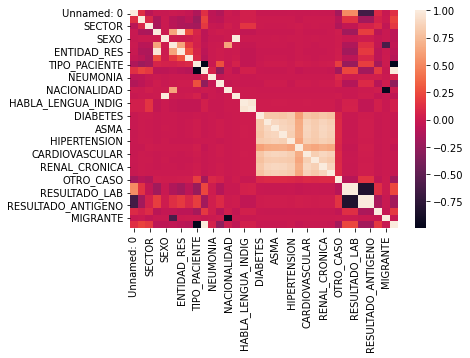

In [ ]:
# Mapa de calor 
sns.heatmap(df.corr())

Se puede apreciar una mayor correlación de los sujetos intubados con las variables de neumonía, cardiovascular, renal crónica, diabetes e hipertensión


Text(0, 0.5, 'Neumonía')

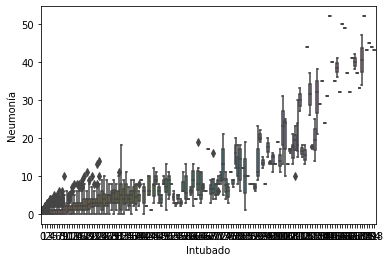

In [ ]:
# Diagrama de cajas y bigotes
ax = sns.boxplot(x = df_entsex["NEUMONIA"], y = df_entsex["INTUBADO"])
ax.set_xlabel('Intubado')
ax.set_ylabel('Neumonía')

Modelo de regresión univariada

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


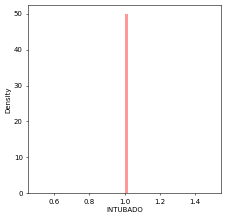

In [12]:
hattack= df[df['INTUBADO']==1] 
plt.figure(figsize=(5,5), dpi = 50) 
sns.distplot(hattack.INTUBADO, color='red')

In [13]:
linear_univ_mod = LinearRegression().fit(df_entsex[['EPOC']], df_entsex[['EDAD']])
print("El intercepto de la regresión es {}. La pendiente de la regresión es {}.".format(round(linear_univ_mod.intercept_[0], 1), round(linear_univ_mod.coef_[0][0], 1)))

El intercepto de la regresión es 46.7. La pendiente de la regresión es 2.5.


In [14]:
df_entsex[['predicted_linear_univ']] = pd.DataFrame(linear_univ_mod.predict(df_entsex[['EPOC']]))

In [23]:
df = df.sample(frac=0.01)
from sklearn.model_selection import train_test_split
df["INTUBADO_1"] = df['INTUBADO']
X = df.drop(columns='INTUBADO')
y = df['INTUBADO']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((768, 41), (192, 41), (768,), (192,))

In [24]:
num_pipe = Pipeline([("scaler",StandardScaler()),
                    ("transform",PowerTransformer(method='yeo-johnson'))])


cat_pipe = Pipeline([("encoder",OneHotEncoder())])

In [25]:
preprosesor = ColumnTransformer([("numeric",num_pipe,['EDAD']),
                              
                               ("category",cat_pipe,['SEXO','ENTIDAD_UM','INTUBADO_1','NEUMONIA','CARDIOVASCULAR', 'RENAL_CRONICA','DIABETES','HIPERTENSION'])])


pipeline = Pipeline([("prep",preprosesor),
                    ("algo",RandomForestClassifier(random_state=42,n_jobs=-1))])

parameter_rf = {'algo__n_estimators': [100, 150, 200],
 'algo__max_depth': [20, 50, 80],
 'algo__max_features': [0.3, 0.6, 0.8],
 'algo__min_samples_leaf': [1, 5, 10]}

rf = GridSearchCV(pipeline,parameter_rf,cv=3,n_jobs=-1,verbose=1)
rf.fit(X_train,y_train)

# evaluacion
print(rf.best_params_)
print(rf.score(X_train,y_train),rf.best_score_,rf.score(X_test,y_test))

Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


{'algo__max_depth': 20, 'algo__max_features': 0.3, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 100}
1.0 nan 1.0


In [26]:
preprosesor = ColumnTransformer([("numeric",num_pipe,['EDAD']),
                              
                               ("category",cat_pipe,['SEXO','ENTIDAD_UM','INTUBADO_1','NEUMONIA','CARDIOVASCULAR', 'RENAL_CRONICA','DIABETES','HIPERTENSION'])])


pipeline = Pipeline([("prep",preprosesor),
                    ("algo",LogisticRegression(multi_class='multinomial',solver='lbfgs',n_jobs=-1,random_state=42))])

parameter_logreg = {'algo__fit_intercept': [True, False],
 'algo__C': np.logspace(-3,3,7)}

logreg = GridSearchCV(pipeline,parameter_logreg,cv=3,n_jobs=-1,verbose=1)
logreg.fit(X_train,y_train)

# evaluacion
print(logreg.best_params_)
print(logreg.score(X_train,y_train),logreg.best_score_,logreg.score(X_test,y_test))

Fitting 3 folds for each of 14 candidates, totalling 42 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  UserWarning,


{'algo__C': 0.001, 'algo__fit_intercept': True}
0.9088541666666666 nan 0.9114583333333334


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


In [29]:
preprosesor = ColumnTransformer([("numeric",num_pipe,['EDAD']),
                              
                               ("category",cat_pipe,['SEXO','ENTIDAD_UM','INTUBADO_1','NEUMONIA','CARDIOVASCULAR', 'RENAL_CRONICA','DIABETES','HIPERTENSION'])])


pipeline = Pipeline([("prep",preprosesor),
                    ("algo",KNeighborsClassifier())])

parameter_knn = {'algo__n_neighbors': np.arange(1,30,2),
 'algo__weights': ['uniform', 'distance'],
 'algo__p': [1, 1.5, 2]}

knn = GridSearchCV(pipeline,parameter_knn,cv=3,n_jobs=-1,verbose=1)
knn.fit(X_train,y_train)

# Evaluation
print(knn.best_params_)
print(knn.score(X_train,y_train),knn.best_score_,knn.score(X_test,y_test))

Fitting 3 folds for each of 90 candidates, totalling 270 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  UserWarning,


{'algo__n_neighbors': 1, 'algo__p': 1, 'algo__weights': 'uniform'}
1.0 nan 0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-pa

In [32]:
models = [knn,rf,logreg]
train_accuracy = []
test_accuracy = []

for i in models:
    y_pred_train = i.predict(X_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    train_accuracy.append(accuracy_train)
    y_pred_test = i.predict(X_test)
    accuracy_test = accuracy_score(y_test,y_pred_test)
    test_accuracy.append(accuracy_test)

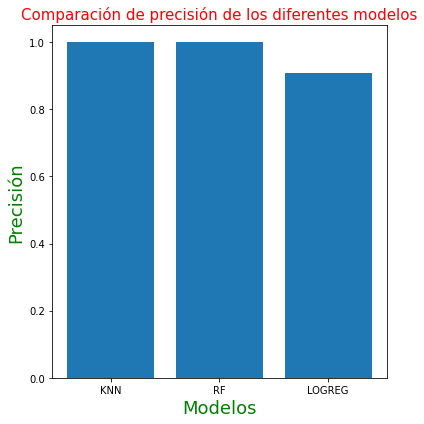

In [40]:
plt.figure(figsize=(6,6))
plt.bar([ 'KNN', 'RF', 'LOGREG'], train_accuracy)
plt.title('Comparación de precisión de los diferentes modelos', fontsize=15, color='r')
plt.xlabel('Modelos', fontsize=18, color='g')
plt.ylabel('Precisión', fontsize=18, color='g')
plt.tight_layout()
plt.show()

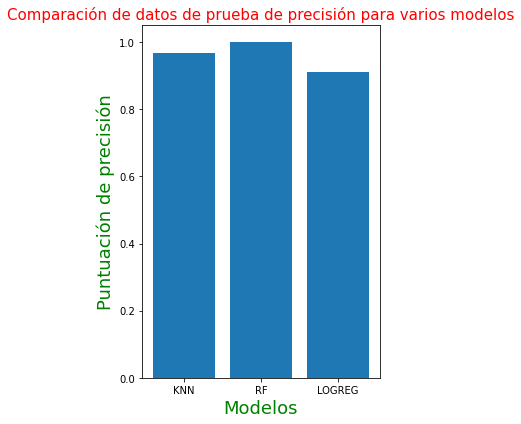

In [39]:
plt.figure(figsize=(6,6))
plt.bar(['KNN', 'RF', 'LOGREG'], test_accuracy)
plt.title('Comparación de datos de prueba de precisión para varios modelos', fontsize=15, color='r')
plt.xlabel('Modelos', fontsize=18, color='g')
plt.ylabel('Puntuación de precisión', fontsize=18, color='g')
plt.tight_layout()
plt.show()